In [2]:
import matplotlib.pyplot as plt
from pycaret.datasets import get_data
from pycaret.regression import *

In [3]:
df = get_data('data/initial_features')

df[['weight', 'pace']] = df['experimental_condition'].str.split('-', expand=True)

df['weight'] = df['weight'].str.replace('Condition ', '').astype(float)
df['pace'] = df['pace'].astype(int)

df['rpe'] = df['rpe'].fillna(method='ffill')
df['rpe'] = df['rpe'].astype(int)       # Change this to float if necessary

In [20]:
df_sample = df[(df['experimental_condition'] == '')]

train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

reg = setup(data=train, target='rpe')

In [21]:
best = compare_models(sort='MAE', include=['rf', 'gbr', 'dt'])
pull()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:29:55
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.0289,2.0929,1.4424,0.6470,0.4761,0.3084,1.485
dt,Decision Tree Regressor,1.1043,3.7677,1.9241,0.3638,0.5910,0.3692,0.384
gbr,Gradient Boosting Regressor,1.2807,2.9531,1.7138,0.5022,0.5484,0.4027,0.791


In [22]:
rf_model = create_model('rf')
gbr_model = create_model('gbr')
dt_model = create_model('dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:30:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8536,1.3720,1.1713,0.7102,0.3820,0.3362
1,1.0394,2.0282,1.4242,0.6597,0.5006,0.3054
2,1.0840,2.3111,1.5202,0.6835,0.4866,0.2922
3,0.9323,1.7371,1.3180,0.6773,0.4203,0.2948
4,1.0540,2.0822,1.4430,0.6571,0.4769,0.3015
5,0.9925,2.1355,1.4613,0.6423,0.4894,0.2480
6,1.0514,2.3132,1.5209,0.6312,0.4732,0.3283
7,1.1160,2.3346,1.5279,0.6034,0.5110,0.3095
8,1.0741,2.2200,1.4900,0.6246,0.5084,0.3410


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:30:37
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0958,2.0867,1.4445,0.5592,0.4517,0.4316
1,1.3003,2.9982,1.7315,0.4969,0.5875,0.3893
2,1.4508,3.5859,1.8937,0.5089,0.5782,0.4434
3,1.1960,2.5176,1.5867,0.5323,0.5074,0.3979
4,1.2703,2.9574,1.7197,0.5130,0.5366,0.3768
5,1.1506,2.5676,1.6024,0.5699,0.5267,0.3171
6,1.2801,3.1739,1.7815,0.4939,0.5340,0.3886
7,1.3833,3.3070,1.8185,0.4382,0.5886,0.3935
8,1.3492,3.1328,1.7700,0.4702,0.6040,0.4588


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:30:45
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9693,2.3558,1.5349,0.5024,0.4854,0.4088
1,1.2593,5.0864,2.2553,0.1466,0.6947,0.3950
2,1.0185,3.0679,1.7515,0.5799,0.5324,0.3603
3,0.7840,2.0926,1.4466,0.6112,0.4830,0.3119
4,1.1481,3.8272,1.9563,0.3698,0.5974,0.3849
5,1.1296,3.8827,1.9705,0.3496,0.5971,0.3410
6,1.1790,4.5247,2.1271,0.2785,0.6049,0.3481
7,1.3765,4.8580,2.2041,0.1747,0.6967,0.4342
8,1.0062,3.8210,1.9547,0.3539,0.6382,0.3357


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
predictions_rf = predict_model(rf_model, data=test)
predictions_gbr = predict_model(gbr_model, data=test)
predictions_dt = predict_model(dt_model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.9851,1.9593,1.3998,0.6805,0.4508,0.3161


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.2692,2.8596,1.6910,0.5337,0.5337,0.4293


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1.0328,3.2401,1.8000,0.4716,0.5623,0.3779


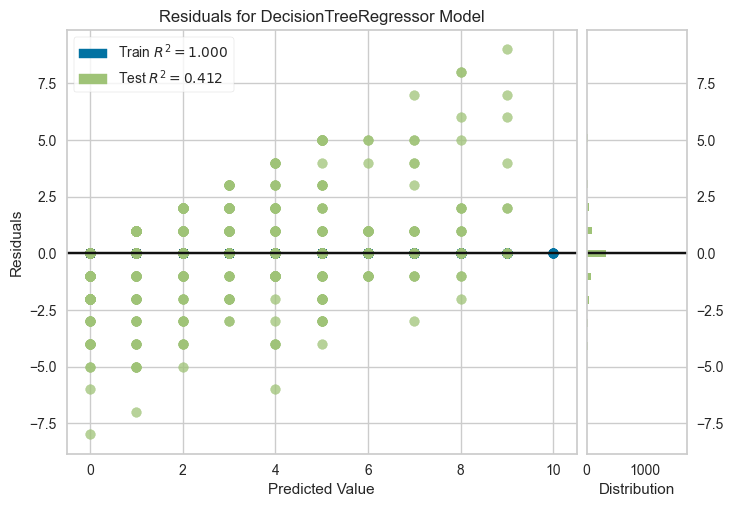

In [26]:
plot_model(dt_model)